# TP5 Naïve bayésienne : Spam ou non-spam


### Table of Contents

* [0. Préparation des données](#chapter0)
* [1. Feature engineering : Texte --> Vecteur](#chapter1)
* [2. La classification naïve bayésienne](#chapter2)


## 0. Préparation des données <a class="anchor" id="chapter0"></a>

Dans ce TP, on va prédire si un sms est un "spam" ou un "non-spam". On va utiliser l'ensemble de données `spam`.

Référence : La base de données `spam` vient du site https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection.

In [1]:
import pandas as pd #pandas pour la gestion des données 
import numpy as np
import matplotlib.pyplot as plt

La première étape : importer les données.

In [2]:
sms = pd.read_csv("spam.csv", encoding='latin')

sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Dans la colonne `v1`, `ham`= "non-spam". On va d'abord renommer les colonnes `v1` et `v2` que l'on va utiliser dans la suite. On va changer `v1`$\rightarrow$ ` Label ` et `v2`$\rightarrow$ `Texte`.

In [3]:
sms.rename(columns={'v1':'Label', 'v2':'Texte'}, inplace=True)

Regardons le changement sur `sms`.

In [4]:
sms.head()

,Label,Texte,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Maintenant on va créer une nouvelle colonne, nommée `Labelnum`, afin de changer `ham`$\rightarrow$ ` 0 ` et `spam`$\rightarrow$ ` 1 `.

In [5]:
sms['Labelnum']=sms['Label'].map({'ham':0,'spam':1})

sms.head()

,Label,Texte,Unnamed: 2,Unnamed: 3,Unnamed: 4,Labelnum
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


**Exercice 1** : `print` le nombre total de données, le nombre de `ham` et le nombre de `spam`. 

In [12]:
# Indication 1 de l'Exercice 1 

a=np.array([0,1,1,1,0])
print (len(a))
print (a[a==0])
print (len(a[a==0]))
print (a[a==1])
print (len(a[a==1]))

Nombre de ham : 4825
Nombre de spam : 747


In [174]:
# Indication 2 de l'Exercice 1 
sms[sms.Labelnum==0].head()

,Label,Texte,Unnamed: 2,Unnamed: 3,Unnamed: 4,Labelnum
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,0


In [175]:
# Indication 3 de l'Exercice 1 
sms[sms.Labelnum==1].head()

,Label,Texte,Unnamed: 2,Unnamed: 3,Unnamed: 4,Labelnum
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,1
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,1
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN,1


In [90]:
# Réponse pour l'exercice 1

print('Nombre de ham :', len(sms['Label'][sms['Label']=='ham']))
print('Nombre de spam :', len(sms['Label'][sms['Label']=='spam']))



Nombre de ham : 4825
Nombre de spam : 747


 **Exercice 2** : (Optionnel) Pour avoir une vision globale de données, on peut figurer l'histogramme de la longueur de chaque sms. 

Indication 1 : Comment accéder à un sms dans les données ? On peut utiliser 
`pandas.DataFrame.loc`. Voir https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

Indication 2: Comment faire un histogramme ? https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html

In [18]:
# Indication 1 de l'Exercice 2

# Un exemple de pandas.DataFrame.loc

# Pour accéder au 1er sms dans les données : 
print (sms.loc[0, 'Texte'])

# et la longueur du 1er sms dans les données : 
print ("--> La longueur du 1er sms est", len(sms.loc[0, 'Texte']))

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
--> La longueur du 1er sms est 111


Text(0.5, 1.0, 'Longueur des sms ham et spam')

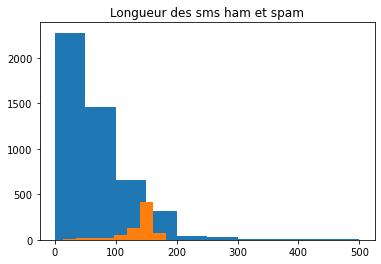

In [42]:
# Réponse pour l'exercice 2

longueur_ham = []
longueur_spam = []

for i in sms.index.values:
    if(sms.loc[i, 'Label']=='ham'):
        longueur_ham.append(len(sms.loc[i, 'Texte']))
    else:
        longueur_spam.append(len(sms.loc[i, 'Texte']))    

plt.hist(longueur_ham, range=[0,500])
plt.hist(longueur_spam)
plt.title('Longueur des sms ham et spam')

#### -------------------------------------

## 1. Feature engineering : Texte --> Vecteur <a class="anchor" id="chapter1"></a>


Dans cette partie, on va changer le texte dans les sms en vecteur de $\mathbb{R}^{p}$. On va utiliser pour cela `CountVectorizer`.

Référence : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html



In [40]:
from sklearn.feature_extraction.text import CountVectorizer

---------------------------------

Regardons d'abord un premier exemple ( l'exemple de l'amphi ) de `CountVectorizer`.

In [41]:
# Un exemple de CountVectorizer

amphi_exemple = pd.DataFrame([['iphone gratuit iphone gratuit',1],['mille vert gratuit',0],
                              ['iphone mille euro',0],['argent gratuit euro gratuit',1]],
                             columns=['sms', 'label'])
vec = CountVectorizer()
X_amphi = vec.fit_transform(amphi_exemple.sms)

# 1. print l'ensemble des vocabulaires

print ("1. L'ensemble des vocabulaires de l'exemple dans l'amphi est", vec.vocabulary_)

# 2. print les vecteurs de sms

print ("2. Les vecteurs de sms sont \n", X_amphi.toarray())

# 3. pour une nouvelle données x_0="iphone gratuit", 
# il faut également changer x_0 en vecteur avant de faire sa prédiction.

vec_x_0=vec.transform(['iphone gratuit']).toarray()
print ("3. Le vecteur de (x_0=iphone gratuit) est \n", vec_x_0 )

1. L'ensemble des vocabulaires de l'exemple dans l'amphi est {'iphone': 3, 'gratuit': 2, 'mille': 4, 'vert': 5, 'euro': 1, 'argent': 0}
2. Les vecteurs de sms sont 
 [[0 0 2 2 0 0]
 [0 0 1 0 1 1]
 [0 1 0 1 1 0]
 [1 1 2 0 0 0]]
3. Le vecteur de (x_0=iphone gratuit) est 
 [[0 0 1 1 0 0]]


**Exercice 3** : On reste toujours dans l'exemple de l'amphi pour l'instant. 

1. Changer $x_1=$ "iphone vert gratuit" en vecteur selon les vocabulaires qu'on a créé avec `X_amphi`. 

2. Changer $x_2=$ "iphone rouge gratuit" en vecteur selon les vocabulaires qu'on a créé avec `X_amphi`. Que constatez-vous?

In [47]:
# Réponse pour l'exercice 3

vec_x_1 = vec.transform(['iphone vert gratuit']).toarray()
vec_x_2 = vec.transform(['iphone rouge gratuit']).toarray()


print(vec_x_1)
print(vec_x_2)

print("On remarque que x2 a été mal vectorisé car le mot 'rouge' n'est pas dans le vocabulaire de vec et ça n'a pas mis de message d'erreur également.")

[[0 0 1 1 0 1]]
[[0 0 1 1 0 0]]
On remarque que x2 a été mal vectorisé car le mot 'rouge' n'est pas dans le vocabulaire de vec et ça n'a pas mis de message d'erreur également.


-------------------------------------

Revenons aux données des sms. Maintenant on va changer les données `sms.Texte` en vecteur et les attribuer à `X`. De plus, on va attribuer `sms.Labelnum` au `Y`.



**Exercice 4** : Créer un modèle de transformation de texte en vecteur, nommé `vectorizer`. Entraîner `vectorizer` sur les données `sms.Texte`.

Remarque: on a déjà importé le package `CountVectorizer`.

Indication : voir l'exemple en haut.

In [58]:
# Réponse pour l'exercice 4

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(sms.Texte)


**Exercice 5** : Changer `sms.Texte` en vecteur et attribuer ces vecteurs au `X`. Attribuer `sms.Labelnum` au `y`. Dans la suite, notre modèle naïf bayésien va être entraîné et testé sur `(X,y)`.


In [66]:
# Réponse pour l'exercice 5

X = V.toarray()
y = sms.Labelnum


On va découper `(X,y)` en l'ensemble d'entraînement et l'ensemble de test. 


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=50)

print ("Nombre des données d'entraînement : ", X_train.shape[0])
print ("Nombre des données de test :", X_test.shape[0])

Nombre des données d'entraînement :  3900
Nombre des données de test : 1672


------------------------------

## 2. La classification naïve bayésienne <a class="anchor" id="chapter2"></a>

Maintenant on va entraîner un modèle de classification naïve bayésienne. Le package qu'on va utiliser est `MultinomialNB` de `sklearn.naive_bayes`.

Référence : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [68]:
from sklearn.naive_bayes import MultinomialNB

**Exercice 6** : 

1. Créer un modèle de classification naïve bayésienne avec le paramètre de lissage $\alpha=1.0$ (`alpha=1.0`), nommé `sms_bayes`.

    Quel est le rôle du paramètre de lissage $\alpha$ ? Voir le cours et cette page : https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes.
    
    

2. Entraîner `sms_bayes` sur (`X_train, y_train`).

In [70]:
# Réponse pour l'exercice 6

sms_bayes = MultinomialNB(alpha=1.0)

sms_bayes.fit(X_train, y_train)





MultinomialNB()

Vérifions le modèle `sms_bayes` sur l'ensemble de test. 

In [71]:
from sklearn.metrics import accuracy_score

y_pred = sms_bayes.predict(X_test)
print ("Le taux de précision sur l'ensemble de test est", 
       accuracy_score(y_test, y_pred))

Le taux de précision sur l'ensemble de test est 0.9754784688995215


In [72]:
print ("C'est pas mal ! \U0001F601")

C'est pas mal ! 😁


---------------------------


*(Optionnel)* Dans l'**Exercice 1**, on a remarqué que dans cet ensemble des sms, il y a beaucoup plus de non-spam (4825) que de spam (747). Dans ce cas, il vaut mieux vérifier également la matrice de confusion.

Référence : Matrice de confusion : https://fr.wikipedia.org/wiki/Matrice_de_confusion

In [73]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, labels =[0,1])

array([[1410,   16],
       [  25,  221]])

*(Optionnel)*  Tester si votre sms va être classifié en spam ou pas ! Remplacer `something new` dans la prochaine cellule par votre sms. 



In [91]:
my_sms=vectorizer.transform(['free free winner iphone']).toarray()

pred_my_sms=sms_bayes.predict(my_sms)

print (pred_my_sms)


[1]


# Optionnel : train avec le vocabulaire de X_train

In [109]:
X_train, X_test, y_train, y_test=train_test_split(sms.Texte,y,test_size=0.99,random_state=50)

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_train = vectorizer.transform(X_train)



sms_bayes = MultinomialNB(alpha=1.0)

sms_bayes.fit(X_train, y_train)

y_pred = sms_bayes.predict(X_test)
print ("Le taux de précision sur l'ensemble de test est", 
       accuracy_score(y_test, y_pred))

Le taux de précision sur l'ensemble de test est 0.9264092804060178


In [114]:
my_sms=vectorizer.transform(['free free money ']).toarray()

pred_my_sms=sms_bayes.predict(my_sms)

print (pred_my_sms)


[0]
